# 🏠 Task 6: House Price Prediction

### 🎯 Objective:
Predict house prices using property features such as size, bedrooms, and location.

## ✅ Step 1: Import Required Libraries
We'll begin by importing necessary libraries for data processing, visualization, and modeling.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import kagglehub
from kagglehub import KaggleDatasetAdapter
import warnings
warnings.filterwarnings('ignore')


## 📥 Step 2: Load Dataset from Kaggle
Load the housing dataset directly from Kaggle using `kagglehub`.


In [37]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Housing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/housing-prices-dataset",
  file_path,
)

print("First 5 records:", df.head())

First 5 records:       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## 🔎 Step 3: Dataset Overview
Check the shape and available columns.


In [38]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())


Shape of dataset: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


## ℹ️ Step 4: Dataset Information
Explore datatypes and null values.


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 📊 Step 5: Summary Statistics
View basic statistical details for each column.


In [40]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 🚫 Step 6: Check for Missing Values
Visualize missing data using a heatmap.


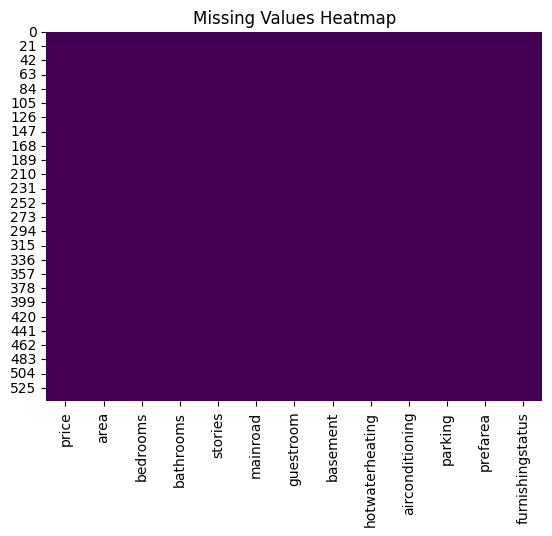

In [41]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


## 🧹 Step 7: Clean Missing Data
Drop rows with missing values (you may use fillna instead).


In [42]:
df.dropna(inplace=True)


## 🔗 Step 8: Feature Correlation Matrix
Visualize correlation among numerical features.


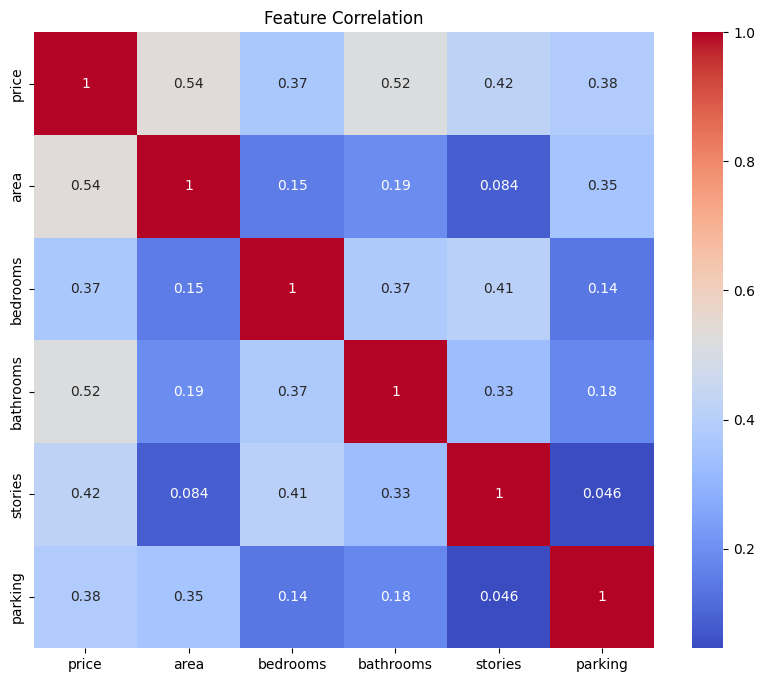

In [43]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

## 💲 Step 9: Distribution of House Prices
Check how house prices are distributed.


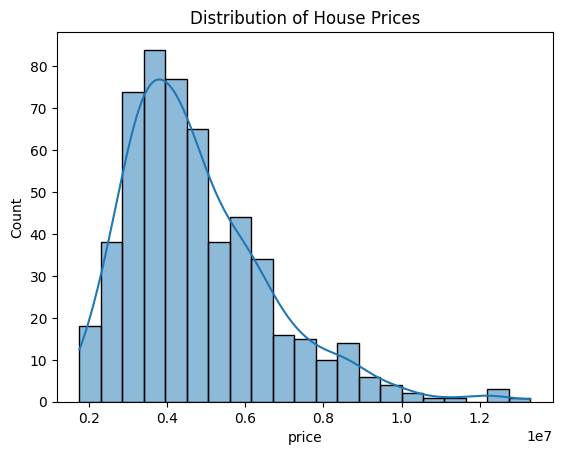

In [44]:
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()


## 🏷️ Step 10: Identify Categorical Features
We’ll list the categorical (non-numeric) columns.


In [45]:
df.select_dtypes(include='object').columns


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

## 🔄 Step 11: Encode Categorical Variables
Convert categorical columns into numeric using one-hot encoding.


In [46]:
df = pd.get_dummies(df, drop_first=True)


## ➕ Step 12: Feature Engineering
Create new features like price per square foot.


In [47]:
df['price_per_sqft'] = df['price'] / df['area']

## 📉 Step 13: Visualize Price vs Square Foot
Plot the relationship between sqft and price.



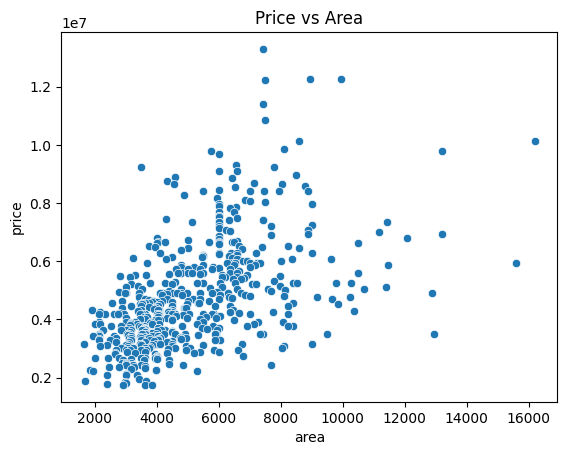

In [48]:
sns.scatterplot(data=df, x='area', y='price')
plt.title("Price vs Area")
plt.show()

## 🛏️ Step 14: Price vs Bedrooms
Check how bedroom count affects price.


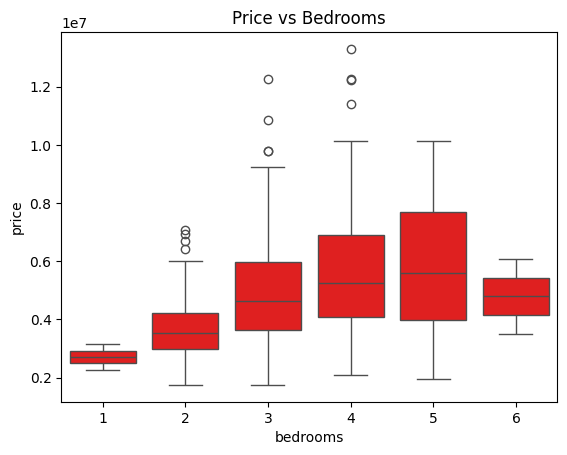

In [62]:
sns.boxplot(data=df, x='bedrooms', y='price',color = 'red')
plt.title("Price vs Bedrooms")
plt.show()


## 🔧 Step 15: Split Data
Separate features and target variable for model training.


In [50]:
X = df.drop('price', axis=1)
y = df['price']


## ✂️ Step 16: Train-Test Split
Divide the data into training and testing sets.


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 📈 Step 17: Train Linear Regression Model
Train a simple linear regression model.


In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## 🔮 Step 18: Predict with Linear Regression
Generate predictions for the test set.



In [53]:
y_pred_lr = lr.predict(X_test)


## 🧪 Step 19: Evaluate Linear Regression
Check MAE and RMSE for the linear model.


In [54]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")

Linear Regression MAE: 504031.78
Linear Regression RMSE: 766300.91


## 🌳 Step 20: Train Gradient Boosting Model
Train a more advanced ensemble model.


In [55]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

## 🔮 Step 21: Predict with Gradient Boosting
Predict house prices using the gradient boosting model.


In [56]:
y_pred_gbr = gbr.predict(X_test)


## 🧪 Step 22: Evaluate Gradient Boosting
Measure the model's accuracy using MAE and RMSE.


In [57]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print(f"Gradient Boosting MAE: {mae_gbr:.2f}")
print(f"Gradient Boosting RMSE: {rmse_gbr:.2f}")

Gradient Boosting MAE: 259974.27
Gradient Boosting RMSE: 431820.34


## 📊 Step 23: Actual vs Predicted Plot
Visualize how close predictions are to actual values.


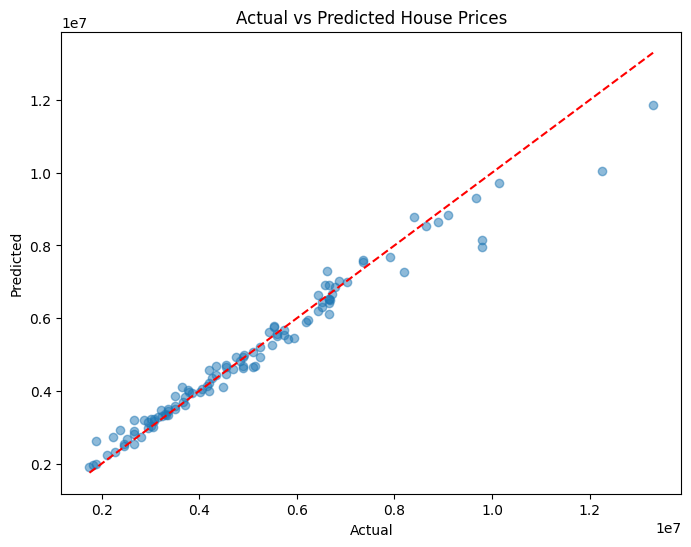

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted House Prices")
plt.show()


## 📌 Step 24: Feature Importance
Show the most impactful features in predicting price.


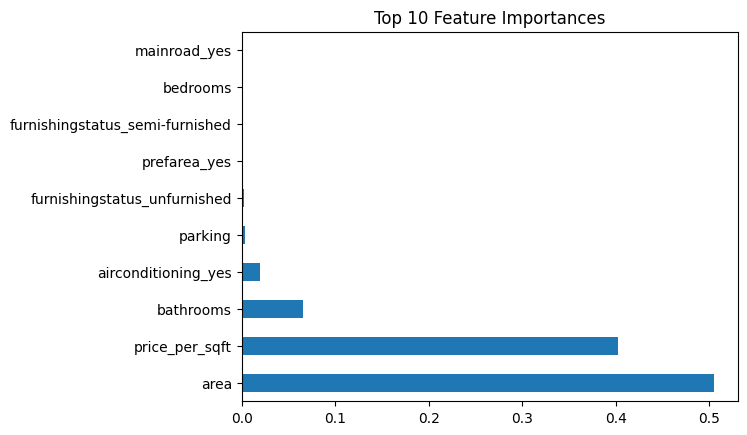

In [59]:
importances = pd.Series(gbr.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


## 📉 Step 25: Residual Analysis
Plot residuals to check errors' distribution.


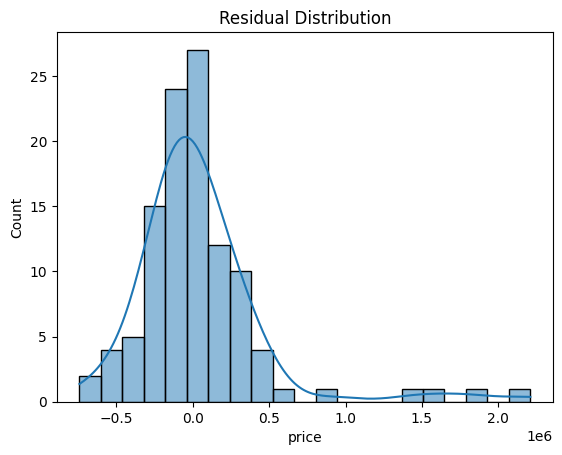

In [60]:
residuals = y_test - y_pred_gbr
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


## ✅ Final Thoughts

- Gradient Boosting outperformed Linear Regression.
- Square footage, location, and condition are key predictors.
- For future improvements, apply feature selection and hyperparameter tuning.
